In [7]:
import scipy
import numpy as np
import matplotlib.pyplot as plt


In [6]:
# Datensatz geladen
ims_cube = scipy.io.loadmat("ims_cube.mat")['ims_cube']

Datenform: (128, 128, 191)
Datentyp: float64


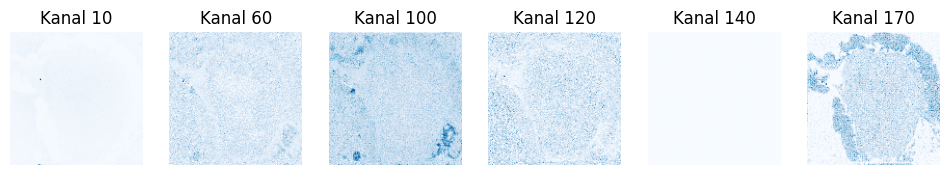

<Figure size 640x480 with 0 Axes>

In [13]:
# 1. Datensatz laden
data = scipy.io.loadmat("ims_cube.mat")
ims_cube = data['ims_cube'] # Datenwürfel mit x,y Position und m/z als Kanalindex
                            # z = eine Liste an Werten

# eintlich ist es kein Würfel
# Man hat ein 2d Bild mit x und y Werten und zu jedem x und y eine Liste [m/z]

# Man hat ein Objekt, schießt mit 190 verschiedenen Lasereinstellungen drauf
# und speichert dann nach jedem Beschuss pro Pixel den "Rückgabewert"
# dadurch hat man dann 190 mal das gleiche Bild nur mit unterschiedlichen Werten,
# da z.B. einmal Proteine(Kanal 34) und einmal Gelatine(Kanal 47) fokussiert sind
# Also nur der Fokus ist unterschiedlich


# Grundlegende Infos über Struktur des Würfels
print("Datenform:", ims_cube.shape)  # (x, y, kanäle)
print("Datentyp:", ims_cube.dtype)

# 2. Beispielhafte Visualisierung einzelner Kanäle
num_channels = ims_cube.shape[2]

# Anzahl gleichmäßig vierteln
channels_to_plot = [10, 60, 100, 120, 140, 170]


# Neue Abbildung mit definierter Größe
plt.figure(figsize=(12, 6))

# Schleife über alle ausgewählten Kanäle
for i, ch in enumerate(channels_to_plot, 1):
    # Lege Position für das aktuelle Teilbild fest (1 Zeile, mehrere Spalten)
    plt.subplot(1, len(channels_to_plot), i)

    # Zeige den jeweiligen Kanal als 2D-Bild
    plt.imshow(ims_cube[:, :, ch], cmap='Blues')
    plt.title(f"Kanal {ch}")  # Beschrifte das Teilbild
    plt.axis('off')           # Achsen ausblenden für saubere Darstellung

# Zeige alle Teilbilder nebeneinander an
plt.show()

plt.suptitle("Räumliche Verteilung ausgewählter Kanäle")
plt.show()


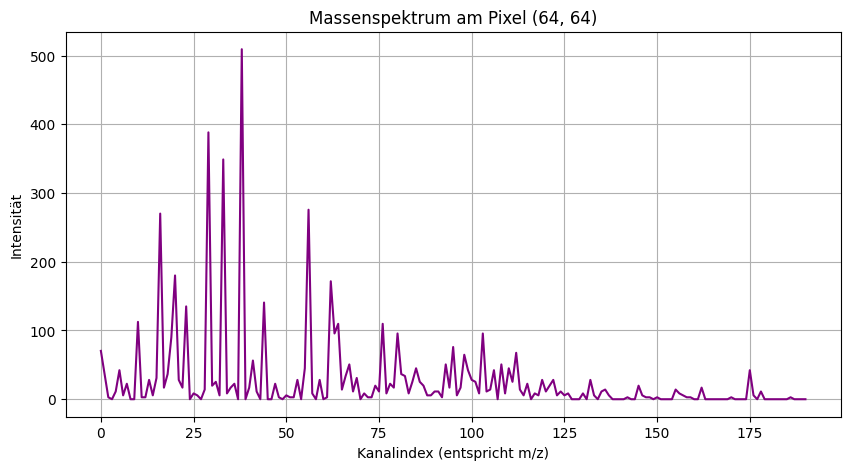

In [3]:
# Beispiel: Pixel in der Mitte des Bildes
x, y = ims_cube.shape[0] // 2, ims_cube.shape[1] // 2
spectrum = ims_cube[x, y, :]

plt.figure(figsize=(10, 5))
plt.plot(spectrum, color='purple')
plt.title(f"Massenspektrum am Pixel ({x}, {y})")
plt.xlabel("Kanalindex (entspricht m/z)")
plt.ylabel("Intensität")
plt.grid(True)
plt.show()
